In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gensim
# !pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 21.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.5.2 requires ml_dtypes>=0.4.0, but you have ml-dtypes 0.3.2 which is incompatible.
dopamine-rl 4.1.2 requires tf-keras>=2.18.0, but you have tf-keras 2.15.1 which is incompatible.


In [ ]:
!pip uninstall -y numpy gensim
# !pip install --upgrade nltk

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2


In [ ]:
# !pip uninstall -y numpy scipy gensim
# !pip install --no-cache-dir numpy==1.23.5 scipy==1.10.1 gensim==4.3.2

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scipy 1.14.1
Uninstalling scipy-1.14.1:
  Successfully uninstalled scipy-1.14.1
Found existing installation: gensim 4.3.2
Uninstalling gensim-4.3.2:
  Successfully uninstalled gensim-4.3.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 164.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 154.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 171.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.

In [ ]:
import numpy as np
print("NumPy Version:", np.__version__)

import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from tqdm.auto import tqdm
import joblib
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
import time
from sklearn.metrics.pairwise import cosine_similarity
import smart_open
# import gensim
import pickle
import os
# import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

NumPy Version: 2.0.2


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.8 MB/s eta 0:00:00


In [ ]:
#os.chdir('/content/drive/My Drive/self_case_study1/data/VAE')

In [ ]:
# Sample data
#df = pd.read_csv('/content/drive/My Drive/StackOverflowData/sample-data.csv')
# Final data
df = pd.read_csv('/content/drive/MyDrive/StackOverflowData/data/all_data.csv')
# df.head()

In [ ]:
# Final data
df = pd.read_csv('/content/drive/MyDrive/StackOverflowData/data/all_data_V2.csv')
# df.head()

In [ ]:
df.shape

(1088418, 7)

In [ ]:
# original title
# df['questions'][2]
df['answers'][2]

'<p>I use both <a href="http://www.microsoft.com/downloads/details.aspx?FamilyID=2f465be0-94fd-4569-b3c4-dffdf19ccd99&amp;displaylang=en" rel="nofollow">Microsoft Script Debugger</a> and <a href="http://getfirebug.com/lite.html" rel="nofollow">FireBug Lite</a>, depending on what I am debugging.  Both are great tools- try them both out and stich with what you\'re comfortable with. </p>@@@<p>In IE8 just press F12!</p>@@@<p>I would recommend <a href="http://www.my-debugbar.com/wiki/CompanionJS/HomePage" rel="nofollow noreferrer">Companion JS</a>.</p>\n\n<p>This is the free version of <a href="http://www.my-debugbar.com/wiki/Doc/HomePage" rel="nofollow noreferrer">Debug Bar</a> but I find it easier to use and have the features I need. Great to test little JavaScript snippets in IE the same way I do with Firebug in Firefox.</p>\n\n<p><strong>EDIT 5 years later</strong>: I now uses Internet Explorer integrated developer tools.</p>@@@<p>IE 8 is supposed to have better tools, but the IE Develo

In [ ]:
# below mentioned functions are helper functions which is use for text preprocessing
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"\n", "", phrase)
    return phrase

def remove_code(text):
    '''This function will remove code part and remove all html tags and return lower case text'''
    text = text.lower()
    # make it proper spaced text
    text = ' '.join(text.split())
    # remove code area from text and replace with space
    text = re.sub('<code>.*?</code>',' ',text)
    # remove all tags which are in "< >"
    text = re.sub('<.*?>',' ',text)
    # remove content between img tags
    text = re.sub('<img.*?>.*?</img>',' ',text)
    # remove content between a tag and URLs
    text = re.sub('<a.*?>.*?</a>',' ',text)
    # decontract text
    text = decontracted(text)
    # remove \n from text
    text = text.replace('\n',' ')
    # remove punctuations except c# and c++
    text = re.sub('[^A-Za-zc#c++]+',' ',text)
    return text.lower()

def remove_stopwords(text):
    '''this function will remove stopwords from text using nltk stopwords'''
    final_text = ''
    for word in text.split():
        if word not in stopwords.words('english'):
            final_text += word + ' '
    return final_text

def preprocess_text(text):
    '''this function will do all preprocessing'''
    # remove code part and punctuations
    removed_code = remove_code(text)
    # remove stopwords
    preprocessed_text = remove_stopwords(removed_code)
    # return cleaned text
    return preprocessed_text

def preprocess_title(text):
    # convert to lower case
    text = text.lower()
    # decontract
    text = decontracted(text)
    # remove all punctuations except a-z and c# and c++
    text = re.sub('[^a-zc#c++]+',' ',text)
    # remove stop words
    text = remove_stopwords(text)
    return text



* In Question body and answer body we have to remove code parts and we have to get only text part so we will remove code part and will remove html tags and all punctuations and we will get clean text in lower case.
*  We will add new column as preprocessed question body and preprocessed answer body.

In [ ]:
# remove code part from question body
removed_code_questions = []
for i,row in tqdm(df.iterrows()):
    removed_code_questions.append(remove_code(row.body))

0it [00:00, ?it/s]

In [ ]:
# remove stopwords from removed_code_questions
preprocessed_questions = []
for i in tqdm(removed_code_questions):
    preprocessed_questions.append(remove_stopwords(i))


NameError: name 'removed_code_questions' is not defined

In [ ]:
# preprocess title
preprocessed_title = []
for i,row in tqdm(df.iterrows()):
    preprocessed_title.append(preprocess_title(row.title))

0it [00:00, ?it/s]

In [ ]:
# original title
df['title'][2]

'JavaScript Troubleshooting Tools in Internet Explorer'

In [ ]:
# cleaned title
preprocessed_title[2]

'javascript troubleshooting tools internet explorer '

In [ ]:
# remove code from answers
removed_code_answers = []
for row in tqdm(df['answers']):
    removed_code_answers.append(remove_code(row))

  0%|          | 0/1088418 [00:00<?, ?it/s]

In [ ]:
# original answer at index 0
df['answers'][0]

'<p>I don\'t understand why you would want to do this. It sounds almost like cargo cult coding.</p>\n\n<p>Converting a CSV file to XML doesn\'t add any value. Your program is already reading the CSV file, so arguing that you need XML doesn\'t work.</p>\n\n<p>On the other hand, reading the CSV file, doing <em>something</em> with the values, and then serializing to XML does make sense (well, as much as using XML can make sense... ;)) but you would supposedly already have a means of serializing to XML.</p>\n<p>Jackson processor family has backends for multiple data formats, not just JSON. This includes both XML (<a href="https://github.com/FasterXML/jackson-dataformat-xml" rel="noreferrer">https://github.com/FasterXML/jackson-dataformat-xml</a>) and CSV (<a href="https://github.com/FasterXML/jackson-dataformat-csv/" rel="noreferrer">https://github.com/FasterXML/jackson-dataformat-csv/</a>) backends.</p>\n\n<p>Conversion would rely on reading input with CSV backend, write using XML backend

In [ ]:
# answers after removing code
removed_code_answers[0]

' i do not understand why you would want to do this it sounds almost like cargo cult coding converting a csv file to xml does not add any value your program is already reading the csv file so arguing that you need xml does not work on the other hand reading the csv file doing something with the values and then serializing to xml does make sense well as much as using xml can make sense but you would supposedly already have a means of serializing to xml jackson processor family has backends for multiple data formats not just json this includes both xml https github com fasterxml jackson dataformat xml and csv https github com fasterxml jackson dataformat csv backends conversion would rely on reading input with csv backend write using xml backend this is easiest to do if you have or can define a pojo for per row csv entries this is not a strict requirement as content from csv may be read untyped as well a sequence of arrays but requires bit more work on xml output for xml side you would n

In [ ]:
# remove stopwords from answers
preprocessed_answers = []
for i in tqdm(removed_code_answers):
    preprocessed_answers.append(remove_stopwords(i))

  0%|          | 0/1088418 [00:00<?, ?it/s]

In [ ]:
df['answers'][0]

'<p>I don\'t understand why you would want to do this. It sounds almost like cargo cult coding.</p>\n\n<p>Converting a CSV file to XML doesn\'t add any value. Your program is already reading the CSV file, so arguing that you need XML doesn\'t work.</p>\n\n<p>On the other hand, reading the CSV file, doing <em>something</em> with the values, and then serializing to XML does make sense (well, as much as using XML can make sense... ;)) but you would supposedly already have a means of serializing to XML.</p>\n<p>Jackson processor family has backends for multiple data formats, not just JSON. This includes both XML (<a href="https://github.com/FasterXML/jackson-dataformat-xml" rel="noreferrer">https://github.com/FasterXML/jackson-dataformat-xml</a>) and CSV (<a href="https://github.com/FasterXML/jackson-dataformat-csv/" rel="noreferrer">https://github.com/FasterXML/jackson-dataformat-csv/</a>) backends.</p>\n\n<p>Conversion would rely on reading input with CSV backend, write using XML backend

In [ ]:
preprocessed_answers[0]

'understand would want sounds almost like cargo cult coding converting csv file xml add value program already reading csv file arguing need xml work hand reading csv file something values serializing xml make sense well much using xml make sense would supposedly already means serializing xml jackson processor family backends multiple data formats json includes xml https github com fasterxml jackson dataformat xml csv https github com fasterxml jackson dataformat csv backends conversion would rely reading input csv backend write using xml backend easiest define pojo per row csv entries strict requirement content csv may read untyped well sequence arrays requires bit work xml output xml side would need wrapper root object contain array objects serialize solution need csv xml libraries know handle illegal characters encoding issues might interested well provided csv input break mentioned rules attention use code unless know chance use library possible bureaucratic projects use stringbuffe

In [ ]:
# dump preprocessed question drive
joblib.dump(preprocessed_questions,'/content/drive/MyDrive/StackOverflowData/pretrain_data_all/preprocessed_questions')

NameError: name 'preprocessed_questions' is not defined

In [ ]:
# dump preprocessed title in drive
joblib.dump(preprocessed_title,'/content/drive/MyDrive/StackOverflowData/pretrain_data_all/preprocessed_title')

['/content/drive/MyDrive/StackOverflowData/pretrain_data_all/preprocessed_title']

In [ ]:
# dump preprocessed answers in drive
joblib.dump(preprocessed_answers,'/content/drive/MyDrive/StackOverflowData/pretrain_data_all/preprocessed_answers')

['/content/drive/MyDrive/StackOverflowData/pretrain_data_all/preprocessed_answers']

In [ ]:
# load preprocessed questions
preprocessed_question = joblib.load('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/preprocessed_questions')

In [ ]:
print('Length of preprocessed questions = ',len(preprocessed_question))

Length of preprocessed questions =  1088418


In [ ]:
# load preprocessed titles
preprocessed_title = joblib.load('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/preprocessed_title')

In [ ]:
print('Length of preprocessed titles= ',len(preprocessed_title))

Length of preprocessed titles=  1088418


In [ ]:
# load preprocessed answers
preprocessed_answer = joblib.load('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/preprocessed_answers')

In [ ]:
print('Length of preprocessed answers= ',len(preprocessed_answer))

Length of preprocessed answers=  1088418


In [ ]:
tags = df['tags']
id = df['id']
score = df['score']
answer = df['answers']

In [ ]:
Dict = { 'id' : id,
         'preprocessed_title' : preprocessed_title,
         'preprocessed_question': preprocessed_question,
         'preprocessed_answer' : preprocessed_answer,
         'score' : score,
         'tags': tags,
         'answer': answer
         }
preprocessed_df = pd.DataFrame(Dict)

In [ ]:
# save as csv
preprocessed_df.to_csv('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/preprocessed_df.csv',index=False)

In [ ]:
# save as csv
preprocessed_df.to_csv('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/preprocessed_df_V2.csv',index=False)

## Load preprocesed data

In [ ]:
preprocessed_df = pd.read_csv('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/preprocessed_df.csv')
# preprocessed_df.head()

In [ ]:
preprocessed_df = pd.read_csv('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/preprocessed_df_V2.csv')
preprocessed_df.head()

,id,preprocessed_title,preprocessed_question,preprocessed_answer,score,tags,answer
0,123,java lib app convert csv xml file,existing application library java allow conver...,understand would want sounds almost like cargo...,17|5|19|31|20|17|9|14|9|4|16|5|71|9|4|49,java|xml|csv|data-conversion,<p>I don't understand why you would want to do...
1,845,detect one defined font used web page,suppose following css rule page could detect o...,using fount drag fount button bookmarks bar cl...,3|10|3|10|5|8|11|37|13|82|2,javascript|html|css|fonts,<p>I am using Fount. You just have to drag the...
2,3404,javascript troubleshooting tools internet expl...,use firebug mozilla js console heavily every r...,use microsoft script debugger firebug lite dep...,3|2|5|4|1|30|20,javascript|internet-explorer|debugging,"<p>I use both <a href=""http://www.microsoft.co..."
3,3713,call asp net function javascript,writing web page asp net javascript code submi...,try could run asp net method using jquery page...,0|0|0|0|2|4|2|0|1|0|3|98|18|61|0|11|1|5|0|1,javascript|c#|asp.net|onclick,<p>I try this and so I could run an Asp.Net me...
4,4630,java webstart multiple dependent native librar...,example two shared objects apply dlls first sh...,static compilation proved way webstart multipl...,5|8|1,java|java-native-interface|java-web-start,<p>Static compilation proved to be the only wa...


In [ ]:
len(preprocessed_df)

1088418

In [ ]:
# cheking for null values
print('Total null values in preprocessed titles =',preprocessed_df['preprocessed_title'].isna().sum())
print('Total null values in preprocessed questions =',preprocessed_df['preprocessed_question'].isna().sum())
print('Total null values in preprocessed answers =',preprocessed_df['preprocessed_answer'].isna().sum())
print('Total null values in score =',preprocessed_df['score'].isna().sum())
print('Total null values in tags =',preprocessed_df['tags'].isna().sum())
print('Total null values in answer =',preprocessed_df['answer'].isna().sum())

Total null values in preprocessed titles = 18
Total null values in preprocessed questions = 923
Total null values in preprocessed answers = 6276
Total null values in score = 0
Total null values in tags = 0
Total null values in answer = 0


In [ ]:
# concatenate title and question body
preprocessed_df['question_content'] = preprocessed_df['preprocessed_title'].fillna('') + ' ' + preprocessed_df['preprocessed_question'].fillna('')

In [ ]:
# remove all character  which has length 1
def remove_single_char(text):
    l = [word for word in str(text).split() if len(word) > 1]
    return ' '.join(l)

In [ ]:
# remove words with length 1 from question content and answer
preprocessed_df['question_content'] = preprocessed_df['question_content'].apply(lambda x: remove_single_char(x))
preprocessed_df['preprocessed_answer'] = preprocessed_df['preprocessed_answer'].apply(lambda x: remove_single_char(x))

In [ ]:
# concatenate question content and preprocessed answer
preprocessed_df['all_text'] = preprocessed_df['question_content'].fillna('')+' '+preprocessed_df['preprocessed_answer'].fillna('')

In [ ]:
preprocessed_df.head()

,id,preprocessed_title,preprocessed_question,preprocessed_answer,score,tags,answer,question_content,all_text
0,123,java lib app convert csv xml file,existing application library java allow conver...,understand would want sounds almost like cargo...,17|5|19|31|20|17|9|14|9|4|16|5|71|9|4|49,java|xml|csv|data-conversion,<p>I don't understand why you would want to do...,java lib app convert csv xml file existing app...,java lib app convert csv xml file existing app...
1,845,detect one defined font used web page,suppose following css rule page could detect o...,using fount drag fount button bookmarks bar cl...,3|10|3|10|5|8|11|37|13|82|2,javascript|html|css|fonts,<p>I am using Fount. You just have to drag the...,detect one defined font used web page suppose ...,detect one defined font used web page suppose ...
2,3404,javascript troubleshooting tools internet expl...,use firebug mozilla js console heavily every r...,use microsoft script debugger firebug lite dep...,3|2|5|4|1|30|20,javascript|internet-explorer|debugging,"<p>I use both <a href=""http://www.microsoft.co...",javascript troubleshooting tools internet expl...,javascript troubleshooting tools internet expl...
3,3713,call asp net function javascript,writing web page asp net javascript code submi...,try could run asp net method using jquery page...,0|0|0|0|2|4|2|0|1|0|3|98|18|61|0|11|1|5|0|1,javascript|c#|asp.net|onclick,<p>I try this and so I could run an Asp.Net me...,call asp net function javascript writing web p...,call asp net function javascript writing web p...
4,4630,java webstart multiple dependent native librar...,example two shared objects apply dlls first sh...,static compilation proved way webstart multipl...,5|8|1,java|java-native-interface|java-web-start,<p>Static compilation proved to be the only wa...,java webstart multiple dependent native librar...,java webstart multiple dependent native librar...


In [ ]:
count_at = preprocessed_df.loc[preprocessed_df['id'] == 123, 'answer'].str.count('@@@').values[0]
print(count_at)
count_at = preprocessed_df.loc[preprocessed_df['id'] == 123, 'score'].str.count('\|').values[0]
print(count_at)

15
15


#### Checking for null values in question content

In [ ]:
# checking in preprocessed_df for null titles
preprocessed_df['question_content'].isna().sum()

0

#### Checking for null values in all text

In [ ]:
# checking in preprocessed_df for null answers
preprocessed_df['all_text'].isna().sum()

0

In [ ]:
preprocessed_df['all_text'][0]

'java lib app convert csv xml file existing application library java allow convert data file file tags would provided possibly first row containing column headings understand would want sounds almost like cargo cult coding converting csv file xml add value program already reading csv file arguing need xml work hand reading csv file something values serializing xml make sense well much using xml make sense would supposedly already means serializing xml jackson processor family backends multiple data formats json includes xml https github com fasterxml jackson dataformat xml csv https github com fasterxml jackson dataformat csv backends conversion would rely reading input csv backend write using xml backend easiest define pojo per row csv entries strict requirement content csv may read untyped well sequence arrays requires bit work xml output xml side would need wrapper root object contain array objects serialize solution need csv xml libraries know handle illegal characters encoding iss

# Analysis of question content

In [ ]:
# import FreqDist from nltk library to get word frequency from given text
from nltk import FreqDist

In [ ]:
# get one single list of whole corpus words
all_words = []
for line in tqdm(preprocessed_df['question_content']):
    all_words.extend(line.split())

  0%|          | 0/1088418 [00:00<?, ?it/s]

In [ ]:
# get frequency distribution of all words
word_freq = FreqDist(all_words)
print('Number of unique words = ',len(word_freq))

Number of unique words =  517328


In [ ]:
# cheecking last 5 words from most common words
word_freq.most_common(20000)[-5:]

[('speechsynthesis', 44),
 ('channelid', 44),
 ('xychart', 44),
 ('loadingcache', 44),
 ('acr', 44)]

\here we are taking top 20000 words because last 5 words of top 20000 words are occuring atleasr 30 times

In [ ]:
# top 20000 words
top_k_words = dict(word_freq.most_common(20000)).keys()

In [ ]:
# set of top k words
top_k_words = set(top_k_words)
print('Length of top k words is = ', len(top_k_words))

Length of top k words is =  20000


In [ ]:
def keep_top_k_words(text):
    ''' This function will keep only top k words'''
    top_k =  [word for word in text.split() if word in top_k_words]
    return ' '.join(top_k)

In [ ]:
# apply keep top words function on question content
preprocessed_df['question_content'] = preprocessed_df['question_content'].apply(lambda x : keep_top_k_words(x))

### Analysis on question content length

In [ ]:
# make column of question content length
preprocessed_df['question_length'] = preprocessed_df['question_content'].apply(lambda x: len(x.split()))

In [ ]:
preprocessed_df.head()

,id,preprocessed_title,preprocessed_question,preprocessed_answer,score,tags,answer,question_content,all_text,question_length
0,123,java lib app convert csv xml file,existing application library java allow conver...,understand would want sounds almost like cargo...,17|5|19|31|20|17|9|14|9|4|16|5|71|9|4|49,java|xml|csv|data-conversion,<p>I don't understand why you would want to do...,java lib app convert csv xml file existing app...,java lib app convert csv xml file existing app...,25
1,845,detect one defined font used web page,suppose following css rule page could detect o...,using fount drag fount button bookmarks bar cl...,3|10|3|10|5|8|11|37|13|82|2,javascript|html|css|fonts,<p>I am using Fount. You just have to drag the...,detect one defined font used web page suppose ...,detect one defined font used web page suppose ...,55
2,3404,javascript troubleshooting tools internet expl...,use firebug mozilla js console heavily every r...,use microsoft script debugger firebug lite dep...,3|2|5|4|1|30|20,javascript|internet-explorer|debugging,"<p>I use both <a href=""http://www.microsoft.co...",javascript troubleshooting tools internet expl...,javascript troubleshooting tools internet expl...,50
3,3713,call asp net function javascript,writing web page asp net javascript code submi...,try could run asp net method using jquery page...,0|0|0|0|2|4|2|0|1|0|3|98|18|61|0|11|1|5|0|1,javascript|c#|asp.net|onclick,<p>I try this and so I could run an Asp.Net me...,call asp net function javascript writing web p...,call asp net function javascript writing web p...,24
4,4630,java webstart multiple dependent native librar...,example two shared objects apply dlls first sh...,static compilation proved way webstart multipl...,5|8|1,java|java-native-interface|java-web-start,<p>Static compilation proved to be the only wa...,java webstart multiple dependent native librar...,java webstart multiple dependent native librar...,64


In [ ]:
preprocessed_df.shape

(1088418, 10)

In [ ]:
print('50th percentile of question lenght is ==>',np.percentile(preprocessed_df['question_length'],50))
print('75th percentile of question lenght is ==>',np.percentile(preprocessed_df['question_length'],75))
print('90th percentile of question lenght is ==>',np.percentile(preprocessed_df['question_length'],90))
print('95th percentile of question lenght is ==>',np.percentile(preprocessed_df['question_length'],95))
print('98th percentile of question lenght is ==>',np.percentile(preprocessed_df['question_length'],98))

50th percentile of question lenght is ==> 41.0
75th percentile of question lenght is ==> 60.0
90th percentile of question lenght is ==> 86.0
95th percentile of question lenght is ==> 107.0
98th percentile of question lenght is ==> 140.0


## plot CDF of question length

<Axes: xlabel='question_length', ylabel='Density'>

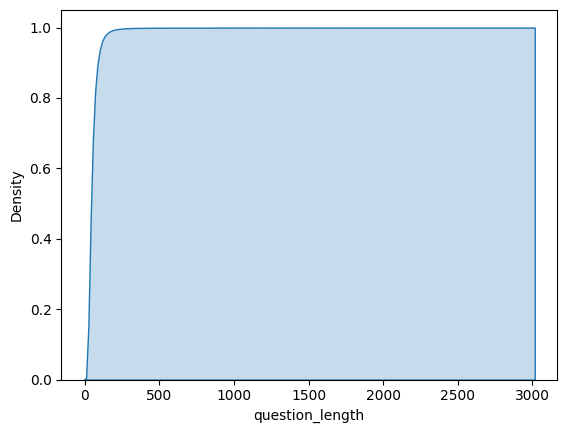

In [ ]:
import seaborn as sns
sns.kdeplot(preprocessed_df['question_length'],cumulative=True,shade=True)

### as we can see 75th percent of question length are 60 or less then 60 so we will consider all questions which have length less then or equal to 60.

In [ ]:
print('Total number of rows which have question length greater then 60 is  =======>')
print(preprocessed_df[preprocessed_df['question_length']>60].shape[0])

Total number of rows which have question length greater then 60 is  =======>
266127


In [ ]:
preprocessed_df = preprocessed_df[preprocessed_df['question_length']<60]
print('Total number of rows in preprocessed_df after dropping large length question = ', preprocessed_df.shape[0])

Total number of rows in preprocessed_df after dropping large length question =  812363


In [ ]:
# reset index
preprocessed_df.reset_index(drop=True,inplace=True)

In [ ]:
preprocessed_df.head()

,id,preprocessed_title,preprocessed_question,preprocessed_answer,score,tags,answer,question_content,all_text,question_length
0,123,java lib app convert csv xml file,existing application library java allow conver...,understand would want sounds almost like cargo...,17|5|19|31|20|17|9|14|9|4|16|5|71|9|4|49,java|xml|csv|data-conversion,<p>I don't understand why you would want to do...,java lib app convert csv xml file existing app...,java lib app convert csv xml file existing app...,25
1,845,detect one defined font used web page,suppose following css rule page could detect o...,using fount drag fount button bookmarks bar cl...,3|10|3|10|5|8|11|37|13|82|2,javascript|html|css|fonts,<p>I am using Fount. You just have to drag the...,detect one defined font used web page suppose ...,detect one defined font used web page suppose ...,55
2,3404,javascript troubleshooting tools internet expl...,use firebug mozilla js console heavily every r...,use microsoft script debugger firebug lite dep...,3|2|5|4|1|30|20,javascript|internet-explorer|debugging,"<p>I use both <a href=""http://www.microsoft.co...",javascript troubleshooting tools internet expl...,javascript troubleshooting tools internet expl...,50
3,3713,call asp net function javascript,writing web page asp net javascript code submi...,try could run asp net method using jquery page...,0|0|0|0|2|4|2|0|1|0|3|98|18|61|0|11|1|5|0|1,javascript|c#|asp.net|onclick,<p>I try this and so I could run an Asp.Net me...,call asp net function javascript writing web p...,call asp net function javascript writing web p...,24
4,4923,wrapping lists columns,using populate template includes html unordere...,flexbox used wrap items row column directions ...,4|4|14|6|5|2|3|3|30|5|2|18|5,javascript|jquery|html|css|cfml,<p>Flexbox can be used to wrap items in both r...,wrapping lists columns using populate template...,wrapping lists columns using populate template...,33


In [ ]:
# save final featurized dataframe
preprocessed_df.to_csv('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/featurized_df.csv',index=False)

In [ ]:
featurized_df = pd.read_csv('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/featurized_df.csv')

In [ ]:
# save final featurized dataframe
preprocessed_df.to_csv('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/featurized_df_V2.csv',index=False)

In [ ]:
featurized_df = pd.read_csv('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/featurized_df_V2.csv')

In [ ]:
print('Shape of featurized_df is ===> ',featurized_df.shape)

Shape of featurized_df is ===>  (812363, 10)


In [ ]:
featurized_df.head(3)

,id,preprocessed_title,preprocessed_question,preprocessed_answer,score,tags,answer,question_content,all_text,question_length
0,123,java lib app convert csv xml file,existing application library java allow conver...,understand would want sounds almost like cargo...,17|5|19|31|20|17|9|14|9|4|16|5|71|9|4|49,java|xml|csv|data-conversion,<p>I don't understand why you would want to do...,java lib app convert csv xml file existing app...,java lib app convert csv xml file existing app...,25
1,845,detect one defined font used web page,suppose following css rule page could detect o...,using fount drag fount button bookmarks bar cl...,3|10|3|10|5|8|11|37|13|82|2,javascript|html|css|fonts,<p>I am using Fount. You just have to drag the...,detect one defined font used web page suppose ...,detect one defined font used web page suppose ...,55
2,3404,javascript troubleshooting tools internet expl...,use firebug mozilla js console heavily every r...,use microsoft script debugger firebug lite dep...,3|2|5|4|1|30|20,javascript|internet-explorer|debugging,"<p>I use both <a href=""http://www.microsoft.co...",javascript troubleshooting tools internet expl...,javascript troubleshooting tools internet expl...,50


In [ ]:
# create dataframe of original title and id
title_df = df[['id','title']]
title_df.head()

,id,title
0,123,Java lib or app to convert CSV to XML file?
1,845,How to detect which one of the defined font wa...
2,3404,JavaScript Troubleshooting Tools in Internet E...
3,3713,Call ASP.NET function from JavaScript?
4,4630,"How can I Java webstart multiple, dependent, n..."


In [ ]:
# attach original title column using merge operation on id

featurized_df = featurized_df.merge(title_df,on='id')

In [ ]:
featurized_df.head(2)

,id,preprocessed_title,preprocessed_question,preprocessed_answer,score,tags,answer,question_content,all_text,question_length,title
0,123,java lib app convert csv xml file,existing application library java allow conver...,understand would want sounds almost like cargo...,17|5|19|31|20|17|9|14|9|4|16|5|71|9|4|49,java|xml|csv|data-conversion,<p>I don't understand why you would want to do...,java lib app convert csv xml file existing app...,java lib app convert csv xml file existing app...,25,Java lib or app to convert CSV to XML file?
1,845,detect one defined font used web page,suppose following css rule page could detect o...,using fount drag fount button bookmarks bar cl...,3|10|3|10|5|8|11|37|13|82|2,javascript|html|css|fonts,<p>I am using Fount. You just have to drag the...,detect one defined font used web page suppose ...,detect one defined font used web page suppose ...,55,How to detect which one of the defined font wa...


### Save final featurized data with original title as csv

In [ ]:
# save final dataframe
featurized_df.to_csv('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/featurized_data.csv',index=False)

In [ ]:
# save final dataframe
featurized_df.to_csv('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/featurized_data_V2.csv',index=False)

#### Load featurized dataframe

In [ ]:
# load final featurized dataframe
featurized_df = pd.read_csv('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/featurized_data.csv')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(featurized_df,test_size=0.5,random_state=42)

# reset index of train and test
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

print('Shape of X_train',X_train.shape)
print('Shape of X_test',X_test.shape)

Shape of X_train (406181, 11)
Shape of X_test (406182, 11)


In [ ]:
X_train.head()

,id,preprocessed_title,preprocessed_question,preprocessed_answer,score,tags,answer,question_content,all_text,question_length,title
0,10511845,loaded simultaneously parallel,two simple js scripts loaded order js referenc...,downloads may may parallel depending browser p...,4,javascript|apache,<p>Downloads may or may not be in parallel (de...,loaded simultaneously parallel two simple js s...,loaded simultaneously parallel two simple js s...,40,Loaded Simultaneously in Parallel?
1,34365869,mean javascript,following lines code mean also address jshint ...,equivalent else statement true false replaced ...,0,javascript|jquery,<p>It's equivalent to an if{}else{} statement....,mean javascript following lines code mean also...,mean javascript following lines code mean also...,17,What Does ? : Mean in JavaScript
2,72294188,want retrive data tabular form using ajax php,written following code showing want show data ...,lies wrong probably file try execute provided ...,1,javascript|php|html|ajax|forms,<p>Here lies the wrong</p>\n<pre><code>/usr/bi...,want retrive data tabular form using ajax php ...,want retrive data tabular form using ajax php ...,29,I want to retrive data in tabular form using a...
3,46873095,add duplicate values map,know map allow duplicate values way add duplic...,add duplicate key values create add values col...,-1,java|collections,<p>You do not add duplicate key values to a <c...,add duplicate values map know map allow duplic...,add duplicate values map know map allow duplic...,36,How to add duplicate Values to a map?
4,37178909,java swing jmenu icon shifts right,add icon jmenu applet run applet icon appear a...,adding solved problem least though menu text s...,0,java|swing|jmenu,<p>Adding this solved my problem at least:</p>...,java swing jmenu icon shifts right add icon jm...,java swing jmenu icon shifts right add icon jm...,28,Java Swing JMenu's icon shifts to right


### **Model-1 : TFIDF word2vec using pretrained glove model**

In [ ]:
# function to load glove vectors
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('/content/drive/MyDrive/StackOverflowData/Model/Glove/glove.42B.300d.txt')

Loading Glove Model


0it [00:00, ?it/s]

Done. 1917494  words loaded!


In [ ]:
X_train['question_content'] = X_train['question_content'].fillna('')

In [ ]:
# get list of lists for every sentence words
words = []
for line in tqdm(X_train['question_content']):
    words.append(line.split())

  0%|          | 0/406181 [00:00<?, ?it/s]

In [ ]:
len(words)

406181

In [ ]:
# get one single list of whole corpus words
Words = []
for line in tqdm(X_train['question_content']):
    Words.extend(line.split())

  0%|          | 0/406181 [00:00<?, ?it/s]

In [ ]:
print("All the words in the courpus", len(Words))
Words = set(Words)
print("The unique words in the courpus", len(Words))
inter_words = set(model.keys()).intersection(Words)
print("The number of words that are present in both glove vectors and our courpus", \
len(inter_words),"(",np.round(len(inter_words)/len(Words)*100,3),"%)")

All the words in the courpus 14175738
The unique words in the courpus 19615
The number of words that are present in both glove vectors and our courpus 17803 ( 90.762 %)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=10)
# fit and transform on question content
tfidf.fit_transform(X_train["question_content"])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10559163 stored elements and shape (406181, 16727)>

In [ ]:
# save tfidf
joblib.dump(tfidf,'/content/drive/MyDrive/StackOverflowData/pretrain_data_all/joblib_dumps_glove_model/tfidf1')

['/content/drive/MyDrive/StackOverflowData/pretrain_data_all/joblib_dumps_glove_model/tfidf1']

In [ ]:
tfidf_words = tfidf.get_feature_names_out()
len(tfidf_words)

16727

In [ ]:
words_courpus = {}
words_glove = set(model.keys())
for i in Words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/joblib_dumps_glove_model/glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


word 2 vec length 17803


## load glove vectors

In [ ]:
with open('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/joblib_dumps_glove_model/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words = set(model.keys())

In [ ]:
# we are converting a dictionary with word as a key, and the idf as a value
tfidf = joblib.load('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/joblib_dumps_glove_model/tfidf1')
dictionary = dict(zip(tfidf.get_feature_names_out(), list(tfidf.idf_)))
tfidf_words = set(tfidf.get_feature_names_out())

In [ ]:

tfidf_w2v_vector = [] # the weighted w2v for each sentence is stored in this list
for sentence in tqdm(words): # for each sentence words list
    vector = np.zeros(300) # as word vectors length is 300
    tf_idf_weight =0; # num of words with a valid vector in the sentence
    for word in sentence : # for each word in a review/sentence
        if (word in glove_words ) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # multiply idf value of word with tf of word
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence))
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vector.append(vector)

NameError: name 'words' is not defined

In [ ]:
# save tfidf w2v vectors
joblib.dump(tfidf_w2v_vector,'/content/drive/MyDrive/StackOverflowData/pretrain_data_all/joblib_dumps_glove_model/tfidf_w2v_vector_glove')

['/content/drive/MyDrive/StackOverflowData/pretrain_data_all/joblib_dumps_glove_model/tfidf_w2v_vector_glove']

In [ ]:
# load tfidf w2v vectors
tfidf_w2v_vector = joblib.load('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/joblib_dumps_glove_model/tfidf_w2v_vector_glove')

In [ ]:
# query question
text = 'java runtime error'
text

'How do I delete a Git branch locally and remotely'

In [ ]:

def find_similarity(question,top_n):
    ''' This function will find top similar result for given query'''
    start = time.time()
    # initialize  vector for user query
    main_vec = np.zeros(300)
    # initialize tfidf weight tổng hợp tfidf
    weight_sum = 0
    # preprocess question
    text = preprocess_title(question)
    #splitting the sentence
    text_list = list(text.split())
    # Tạo vector đại diện cho câu hỏi đầu vào
    for word in text_list:
        #finding if word is present in tfidf and in w2v words
        if word in tfidf_words and word in glove_words :
            #finding vector of word from glove model
            vect = model[word]
            #compute tfidf
            tf_idf = dictionary[word]*(text_list.count(word)/len(text_list))
            # adding vector * tfidf to main_vec
            main_vec+= (vect*tf_idf)
            # summing tfidf values
            weight_sum += tf_idf
    if weight_sum !=0:
        # devide by weight_sum
        main_vec /= weight_sum
    # find cosine similarity
    similarities =  cosine_similarity((main_vec).reshape(1, -1), Y=tfidf_w2v_vector, dense_output=True)
    # sort similarities
    #print(similarities[0])

    sort = np.argsort(similarities[0])
    # get top similarity indices  in descending order
    similarity_index = np.array(list(reversed(sort)))
    # finad top n similarities
    top_similarity_index = similarity_index[:top_n]
    # print top similarity values
    print('Top cosine similarities are ======>',similarities[0][top_similarity_index])
    # get original title of similar questions
    similar_questions = X_train['title'][top_similarity_index]
    #print(similar_questions)

    similar_question_list = []
    for q in similar_questions:
        similar_question_list.append(q)
        #print(q)
    total_time = (time.time() - start)
    print('Total time ===========> ',total_time)
    return similar_question_list


In [ ]:
text = 'How many types of memory areas are allocated by JVM'
top_10_questions = find_similarity(text,10)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# print('Top 10 similar questions Using weighted TFIDF and Glove vectors')
# print('='*100)
# print('\t')
# for i,line in enumerate(top_10_questions):
#     print('Question {} ===> {}'.format(i+1,line))
#     print('='*100)
text = 'What is Deserialization'
print('Top 10 similar questions Using weighted TFIDF and Glove vectors')
print('='*100)
print('\t')
for i,line in enumerate(find_similarity(text,10)):
    print('Question {} ===> {}'.format(i+1,line))
    print('='*100)

Top 10 similar questions Using weighted TFIDF and Glove vectors
	
Top cosine similarities are ======> [0.72517292 0.71749255 0.57482943 0.57030979 0.54699484 0.53711764
 0.53541992 0.52935015 0.52710608 0.52583362]
Total time ===========>  1.5695760250091553
Question 1 ===> IKVMC, MONO: ClassCastException while deserialization
Question 2 ===> SimpleXML deserialization error in Android
Question 3 ===> How to deserialize a Serializable object from AsynchronousSocketChannel
Question 4 ===> Serializing a synchronizedMap with Kryo
Question 5 ===> How to deserialize a json data using GSON?
Question 6 ===> How to use dynamic deserialization on a property using JsonSubTypes?
Question 7 ===> Deserialization exception to deserialize json String
Question 8 ===> Deserialize recursive polymorphic class in GSON
Question 9 ===> How to Serialize and Deserialize an XMLDocument in Javascript?
Question 10 ===> Why doesn't Serializable interface contain any methods?


# Model-2 : train word2vec using gensim

In [ ]:
from gensim.models import Word2Vec

In [ ]:
words

[['loaded',
  'simultaneously',
  'parallel',
  'two',
  'simple',
  'js',
  'scripts',
  'loaded',
  'order',
  'js',
  'reference',
  'function',
  'js',
  'js',
  'invokes',
  'defined',
  'js',
  'servers',
  'error',
  'thrown',
  'recognized',
  'js',
  'executed',
  'machines',
  'error',
  'thrown',
  'two',
  'scripts',
  'loaded',
  'simultaneously',
  'parallel',
  'sequence',
  'answer',
  'depend',
  'architecture',
  'servers',
  'multi',
  'core',
  'etc',
  'thanks'],
 ['mean',
  'javascript',
  'following',
  'lines',
  'code',
  'mean',
  'also',
  'address',
  'jshint',
  'warning',
  'expected',
  'assignment',
  'function',
  'call',
  'instead',
  'saw',
  'expression'],
 ['want',
  'retrive',
  'data',
  'tabular',
  'form',
  'using',
  'ajax',
  'php',
  'written',
  'following',
  'code',
  'showing',
  'want',
  'show',
  'data',
  'click',
  'button',
  'new',
  'javascript',
  'well',
  'php',
  'way',
  'perform',
  'something',
  'like',
  'run',
  'php',

In [ ]:
# train Word2vec model with vector size 60
w2v_model = Word2Vec(words, vector_size=60, min_count=10, workers=-1, epochs=50)

In [ ]:
word_vectors = w2v_model.wv

In [ ]:
# shape of w2v vectors
word_vectors.vectors.shape

(17961, 60)

In [ ]:
# save word2vec model
joblib.dump(w2v_model,'/content/drive/MyDrive/StackOverflowData/pretrain_data_all/joblib_dumps/gensim_w2v_model')

['/content/drive/MyDrive/StackOverflowData/pretrain_data_all/joblib_dumps/gensim_w2v_model']

In [ ]:
print(gensim.__version__)

4.3.3


In [ ]:
# get word2vec vocab
w2v_words = list(w2v_model.wv.index_to_key)
print("sample words =====>", w2v_words[0:10])

sample words =====> ['code', 'using', 'want', 'like', 'java', 'get', 'javascript', 'file', 'use', 'function']


In [ ]:
# number of unique word in word2vec vocab
print('Number of unique words in Word2vec ==> ',len(w2v_words))

Number of unique words in Word2vec ==>  17961


In [ ]:
# Words list have all the words which are in corpus
print("All the words in the courpus", len(Words))
# unique words from whole X_train
Words = set(Words)
print("The unique words in the courpus", len(Words))
# common word of w2v_words and Words
inter_words = set(w2v_words).intersection(Words)
print("The number of words that are present in both glove vectors and our courpus", \
len(inter_words),"(",np.round(len(inter_words)/len(Words)*100,3),"%)")

All the words in the courpus 19615
The unique words in the courpus 19615
The number of words that are present in both glove vectors and our courpus 17961 ( 91.568 %)


### **TF-IDF weighted W2V using gensim**

In [ ]:
# dictionary in which word as key and idf as value
dictionary = dict(zip(tfidf.get_feature_names_out(),tfidf.idf_))
print("Sample dictionary: ", list(dictionary.items())[:10])

Sample dictionary:  [('aa', 8.52092906764797), ('aaa', 9.04702216354475), ('aaaa', 10.618719747996002), ('aaaaa', 11.51666134120196), ('aab', 11.14196789176055), ('aabb', 11.275499284385072), ('aac', 11.081343269944115), ('aapt', 10.91882434044634), ('aar', 10.513359232338177), ('aaron', 11.42964996421233)]


In [ ]:
# check for random word
dictionary['javascript']

2.741603503924972

In [ ]:
# number of words in dictionary
len(dictionary)

16727

In [ ]:
# get tfidf words
tfidf_words = set(tfidf.get_feature_names_out())

In [ ]:
tfidf_w2v_vectors_gensim = [] # the weighted w2v for each sentence is stored in this list
for sentence in tqdm(words): # for each sentence
    vector = np.zeros(60) # as word vectors length is 60
    tf_idf_weight =0; # num of words with a valid vector in the sentence
    for word in sentence : # for each word in a review/sentence
        if (word in w2v_words) and (word in tfidf_words):
            vec = w2v_model.wv[word] # getting the vector for each word
            # multiply idf value of word with tf of word
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence))
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_gensim.append(vector)


  0%|          | 0/406181 [00:00<?, ?it/s]

In [ ]:
len(tfidf_w2v_vectors_gensim)

544209

In [ ]:
# save tfidf w2v vectors using gensim
joblib.dump(tfidf_w2v_vectors_gensim,'/content/drive/MyDrive/StackOverflowData/pretrain_data_all/joblib_dumps/tfidf_w2v_vectors_gensim')

['/content/drive/MyDrive/StackOverflowData/pretrain_data_all/joblib_dumps/tfidf_w2v_vectors_gensim']

In [ ]:
# total number of vectors
print('Total number of vectors = ',len(tfidf_w2v_vectors_gensim))
# length of single vector
print('Size of single vector = ',len(tfidf_w2v_vectors_gensim[0]))

Total number of vectors =  406181
Size of single vector =  60


##### **Load all saved files**

In [ ]:
tfidf_gensim = joblib.load('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/joblib_dumps_glove_model/tfidf1')
w2v_model_gensim = joblib.load('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/joblib_dumps/gensim_w2v_model')
tfidf_w2v_vectors_gensim = joblib.load('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/joblib_dumps/tfidf_w2v_vectors_gensim')

In [ ]:
# w2vec words vocabulary
w2v_words = list(w2v_model_gensim.wv.index_to_key)
# tfidf words
tfidf_words = set(tfidf_gensim.get_feature_names_out())
# dictionary of tfidf and idf values
dictionary = dict(zip(tfidf_gensim.get_feature_names_out(),tfidf_gensim.idf_))

In [ ]:
text = 'How do I delete a Git branch locally and remotely'

In [ ]:
def find_similarity_gensim_trained(question,top_n):
    ''' This function will find top similar result for given query using gensim w2v'''
    start = time.time()
    # initialize  vector for user query
    main_vec = np.zeros(60)
    # initialize tfidf weight
    weight_sum = 0
    # preprocess question
    text = preprocess_title(question)
    #splitting the sentence
    text_list = list(text.split())
    for word in text_list:
        #finding if word is present in tfidf and in w2v words
        if word in tfidf_words and word in w2v_words :
            #finding vector of word from glove model
            vect = w2v_model_gensim.wv[word]
            #compute tfidf
            tf_idf = dictionary[word]*(text_list.count(word)/len(text_list))
            # adding vector * tfidf to main_vec
            main_vec+= (vect*tf_idf)
            # summing tfidf values
            weight_sum += tf_idf
    if weight_sum !=0:
        # devide by weight_sum
        main_vec /= weight_sum
    # find cosine similarity
    # tfidf word2vec have trained using gensim
    similarities =  cosine_similarity((main_vec).reshape(1, -1), Y=tfidf_w2v_vectors_gensim, dense_output=True)
    # sort similarities
    sort = np.argsort(similarities[0])
    # get top similarity indices  in descending order
    similarity_index = np.array(list(reversed(sort)))
    # find top n similarities
    top_similarity_index = similarity_index[:top_n]
    # print top similarity values
    print('Top cosine similarities are ======>',similarities[0][top_similarity_index])
    similar_questions = X_train['title'][top_similarity_index]
    #print(similar_questions)
    similar_question_list = []
    for q in similar_questions:
        similar_question_list.append(q)
        #print(q)
    total_time = (time.time() - start)
    print('\t')
    print('Total time ===========> ',total_time)
    return similar_question_list

In [ ]:
top_10_similar_q = find_similarity_gensim_trained(text,10)

Top cosine similarities are ======> [0.64204519 0.63910615 0.61287773 0.60609594 0.60404045 0.59828604
 0.56821614 0.56476213 0.55919128 0.55558138]
	
Total time ===========>  0.6133198738098145


In [ ]:
text = 'What are the differences between the constructors and methods Java'
top_10_similar_q = find_similarity_gensim_trained(text,10)
print('Top 10 similar questions Using weighted TFIDF and gensim Word2Vec')
print('='*100)
print('\t')
for i,line in enumerate(top_10_similar_q):
    print('Question {} ===> {}'.format(i+1,line))
    print('='*100)

Top cosine similarities are ======> [0.62980491 0.62713995 0.61859083 0.60414647 0.60344119 0.58292723
 0.56217084 0.5480942  0.54479092 0.53334405]
	
Total time ===========>  0.8251497745513916
Top 10 similar questions Using weighted TFIDF and gensim Word2Vec
	
Question 1 ===> Finding differences in a array
Question 2 ===> differences between defining functions/methods in JS?
Question 3 ===> Differences between $('.class').on and $(document).on in jquery
Question 4 ===> what's the differences between using <> and not using it in java?
Question 5 ===> What are the differences between PHP and Java?
Question 6 ===> What are the differences between these regex metacharacters?
Question 7 ===> Differences between instances
Question 8 ===> What is the difference between given trigonometric functions?
Question 9 ===> differences between spring jdbctemplate and Hibernate
Question 10 ===> What are the differences between two versions of Scanner?


# Model-3 : Universal sentence encoder
Reference : https://tfhub.dev/google/universal-sentence-encoder/4

In [ ]:
#tf.keras.backend.clear_session()

In [ ]:
!pip install tensorflow_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.1 MB/s eta 0:00:00


In [ ]:
import tensorflow_hub as hub

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


tf.logging.set_verbosity(tf.logging.ERROR)
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
def embed_text(sentences):
    ''' This function will convert sentence into vector using universal sentence encoder'''
    # Reduce logging output.
    tf.logging.set_verbosity(tf.logging.ERROR)

    with tf.Session() as session:
        session.run([tf.global_variables_initializer(), tf.tables_initializer()])
        # create vectors from sentences
        embeddings = session.run(embed(sentences))
        # return  embeddings
        return embeddings

Instructions for updating:
non-resource variables are not supported in the long term


### **Now we will doing sentence embedding in 4 parts because i have around 2 lacks rows so my colab will crash so i am doing sentence embedding in 4 parts and after that i will concatenate**

In [ ]:
X_train = X_train.dropna(subset=["question_content"])

In [ ]:
start = time.time()
question_embedding1 = embed_text(X_train["question_content"][:100000])
print('Total time ====> ',(time.time() - start))

Total time ====>  72.09801864624023


In [ ]:
print('Shape of question_embedding1 is = ',question_embedding1.shape)

Shape of question_embedding1 is =  (100000, 512)


In [ ]:
X_train["question_content"].shape

(406181,)

In [ ]:
start = time.time()
question_embedding2 = embed_text(X_train["question_content"][100000:200000])
print('Total time ====> ',(time.time() - start))

Total time ====>  72.07927751541138


In [ ]:
start = time.time()
question_embedding3 = embed_text(X_train["question_content"][200000:300000])
print('Total time ====> ',(time.time() - start))

Total time ====>  70.97007012367249


In [ ]:
start = time.time()
question_embedding4 = embed_text(X_train["question_content"][300000:406181])
print('Total time ====> ',(time.time() - start))

Total time ====>  75.90524458885193


In [ ]:
import numpy as np

save_path1 = "/content/drive/MyDrive/StackOverflowData/Model4Var/question_embedding1.npy"
save_path2 = "/content/drive/MyDrive/StackOverflowData/Model4Var/question_embedding2.npy"
save_path3 = "/content/drive/MyDrive/StackOverflowData/Model4Var/question_embedding3.npy"
save_path4 = "/content/drive/MyDrive/StackOverflowData/Model4Var/question_embedding4.npy"

np.save(save_path1, question_embedding1)
np.save(save_path2, question_embedding2)
np.save(save_path3, question_embedding3)
np.save(save_path4, question_embedding4)

print(f"Saved all")

Saved all


In [ ]:
print('Shape of question_embedding1 is = ',question_embedding1.shape)
print('Shape of question_embedding1 is = ',question_embedding2.shape)
print('Shape of question_embedding1 is = ',question_embedding3.shape)
print('Shape of question_embedding1 is = ',question_embedding4.shape)

Shape of question_embedding1 is =  (100000, 512)
Shape of question_embedding1 is =  (100000, 512)
Shape of question_embedding1 is =  (100000, 512)
Shape of question_embedding1 is =  (106181, 512)


In [ ]:
# Do chỉ 1 tập dữ liệu thử nên cần đặt vào mảng để concatenate thành 2 chiều
question_embeddings = np.concatenate([question_embedding1], axis=0)
print('Shape of final question embedding is ===> ',question_embeddings.shape)

Shape of final question embedding is ===>  (452, 512)


In [ ]:
# concatenate all embeddings on axis 0 (vertically)
#chạy cái này khi thực nghiệm với data thật
question_embeddings = np.concatenate((question_embedding1,question_embedding2,question_embedding3,question_embedding4),axis=0)
# question_embeddings = np.concatenate((question_embedding1),axis=0)
print('Shape of final question embedding is ===> ',question_embeddings.shape)

Shape of final question embedding is ===>  (406181, 512)


In [ ]:
# store question embeddings using joblib
joblib.dump(question_embeddings,'/content/drive/MyDrive/StackOverflowData/pretrain_data_all/universal_embed/universal_question_embedding')

['/content/drive/MyDrive/StackOverflowData/pretrain_data_all/universal_embed/universal_question_embedding']

In [ ]:
# store question embeddings using joblib
joblib.dump(question_embeddings,'/content/drive/MyDrive/StackOverflowData/pretrain_data_all/universal_embed/universal_question_embedding.pkl')

['/content/drive/MyDrive/StackOverflowData/pretrain_data_all/universal_embed/universal_question_embedding.pkl']

In [ ]:
# load question embeddings
question_embeddings = joblib.load('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/universal_embed/universal_question_embedding')

(212583, 512)

# Find similarity for user query

In [ ]:
def find_similarity_universal_sentence_encoder(question,top_n):
    ''' This function will find top similar result for given query using universal sentence encoder'''
    start = time.time()
    # initialize  vector for user query
    query_vector = embed_text([question])
    similarities =  cosine_similarity((query_vector).reshape(1, -1), Y=question_embeddings, dense_output=True)
    # sort similarities
    sort = np.argsort(similarities[0])
    # get top similarity indices  in descending order
    similarity_index = np.array(list(reversed(sort)))
    # find top n similarities
    top_similarity_index = similarity_index[:top_n]
    # print top similarity values
    print('Top cosine similarities are ======>',similarities[0][top_similarity_index])
    # get similar questions title
    similar_questions = X_train['title'][top_similarity_index]
    # create similar questions title list
    similar_question_list = []
    for q in similar_questions:
        similar_question_list.append(q)
    total_time = (time.time() - start)
    print('\t')
    print('Total time ===========> ',total_time)
    return similar_question_list

In [ ]:
query = 'how to configure garbage collector in java'
USE = find_similarity_universal_sentence_encoder(query,top_n=10)

Top cosine similarities are ======> [0.7470443  0.72620034 0.7191516  0.6986371  0.69346    0.6687784
 0.65456104 0.6344153  0.6260992  0.6256138 ]
	
Total time ===========>  9.986020803451538


In [ ]:
query = 'What are wrapper classes'
USE = find_similarity_universal_sentence_encoder(query,top_n=10)
print('Top 10 similar questions Using Universal sentence encoder')
print('='*100)
print('\t')
for i,line in enumerate(USE):
    print('Question {} ===> {}'.format(i+1,line))
    print('='*100)

Top cosine similarities are ======> [0.57022184 0.52115667 0.5143494  0.51188946 0.50810134 0.50208294
 0.5015961  0.5010762  0.4907817  0.48639095]
	
Total time ===========>  14.686711311340332
Top 10 similar questions Using Universal sentence encoder
	
Question 1 ===> Primitive Types vs Wrapper Classes
Question 2 ===> How does wrapper class object initialisation works?
Question 3 ===> what is the best way to create primitive wrapper class in Java
Question 4 ===> How Wrapper classes works
Question 5 ===> How can I get a 'String...' wrapper?
Question 6 ===> wrapper classes do not need constructor call?
Question 7 ===> Found some classes named like Class1$Class2, are those inner classes?
Question 8 ===> Is the 'toString' method of Java Wrapper classes overloaded or is it an abstract method that has different definitions in different classes?
Question 9 ===> Find classes which doesn't reference any other custom classes
Question 10 ===> define an instance object in class inside another cl

# Model-4 : BERT Embedding
Reference : https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2


In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
# import tensorflow_text as text
from tensorflow.keras.models import Model

In [ ]:
!pip install -U "tensorflow-text==2.15.*"
!pip install -U "tf-models-official==2.15.*"
!pip install -U "tensorflow-hub==0.16.1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.0 MB/s eta

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
^C
^C


In [ ]:
# !pip3 install tf_keras==2.16
# !pip3 install --upgrade tensorflow-hub

# import os
# os.environ['TF_USE_LEGACY_KERAS']='1'

In [ ]:
# !pip install tf_keras==2.16

In [ ]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

In [ ]:
os.chdir('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/BERT')

In [ ]:
# def create_bert_model(seq_length):
#     # clear tensorflow backend
#     tf.keras.backend.clear_session()

#     text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
#     preprocessor = keras_nlp.models.BertPreprocessor.from_preset("bert_base_en_uncased",trainable=True)
#     encoder_inputs = preprocessor(text_input)
#     encoder = keras_nlp.models.BertBackbone.from_preset("bert_base_en_uncased")
#     outputs = encoder(encoder_inputs)
#     pooled_output = outputs["pooled_output"]      # [batch_size, 768].
#     sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 768].
#     bert_model = Model(inputs=[text_input, encoder_inputs, segment_ids], outputs=pooled_output)

#     return bert_model


In [ ]:
!pip install transformers

In [ ]:
def create_bert_model(seq_length):
    # clear tensorflow backend
    tf.keras.backend.clear_session()

    # Max sequence length
    max_seq_length = seq_length # Your choice here.
    # input words represented as integer
    input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                        name="input_word_ids")
    # mask vector for padding
    input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="input_mask")

    #
    segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                        name="segment_ids")
    # bert layer
    bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2",
                                trainable=True)
    # output from bert layer
    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    # bert model
    bert_model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=pooled_output)
    # return model
    return bert_model


In [ ]:
bert_model = create_bert_model(60)
bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_word_ids (InputLayer  [(None, 60)]                 0         []                            
 )                                                                                                
                                                                                                  
 input_mask (InputLayer)     [(None, 60)]                 0         []                            
                                                                                                  
 segment_ids (InputLayer)    [(None, 60)]                 0         []                            
                                                                                                  
 keras_layer (KerasLayer)    [(None, 768),                1094822   ['input_word_ids[0][0]',  

In [ ]:
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2",
                                trainable=True)

In [ ]:
# reference : https://github.com/tensorflow/models/blob/master/official/nlp/bert/tokenization.py
!pip install bert-tensorflow
from bert import tokenization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.8 MB/s eta 0:00:00


In [ ]:
 max_seq_length = 60

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
# do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
# tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [ ]:
def tokenize_for_bert(text):
    ''' This function will return tokens as integer encoded and mask tokens and segment'''
    encoded = tokenizer.encode_plus(
        text,
        add_special_tokens=True,  # Thêm [CLS] và [SEP]
        max_length=max_seq_length,
        truncation=True,  # Cắt nếu dài quá
        padding="max_length",  # Đệm thêm nếu ngắn
        return_tensors="tf"  # Trả về tensor TensorFlow
    )

    #tokenizer
    input_word_ids = encoded["input_ids"][0].numpy().tolist()
    input_mask = encoded["attention_mask"][0].numpy().tolist()
    segment_ids = encoded["token_type_ids"][0].numpy().tolist()

    return input_word_ids, input_mask, segment_ids

In [ ]:
# convert train data into tokens, mask and segments for bert input
# initialize token,mask and segment as zeros
X_train_token = np.zeros(shape = (len(X_train),max_seq_length))
X_train_mask = np.zeros(shape = (len(X_train),max_seq_length))
X_train_segment = np.zeros(shape = (len(X_train),max_seq_length))

#iterate through X_train
for i in tqdm(range(len(X_train))):
    tokens, mask, segment = tokenize_for_bert(X_train['question_content'][i])
    X_train_token[i] = tokens
    X_train_mask[i] = mask
    X_train_segment[i] = segment

  0%|          | 0/406181 [00:00<?, ?it/s]

In [ ]:
print('Shape of X_train token',X_train_token.shape)
print('Shape of X_train mask',X_train_mask.shape)
print('Shape of X_train segment',X_train_segment.shape)

Shape of X_train token (406181, 60)
Shape of X_train mask (406181, 60)
Shape of X_train segment (406181, 60)


In [ ]:
import numpy as np

save_path = "/content/drive/MyDrive/StackOverflowData/pretrain_data_all/BERT/data/X_train_data.npz"
np.savez_compressed(save_path, X_train_token=X_train_token, X_train_mask=X_train_mask, X_train_segment=X_train_segment)

print(f"Dữ liệu đã lưu tại: {save_path}")


Dữ liệu đã lưu tại: /content/drive/MyDrive/StackOverflowData/pretrain_data_all/BERT/data/X_train_data.npz


In [ ]:
import numpy as np
loaded_data = np.load("/content/drive/MyDrive/StackOverflowData/pretrain_data_all/BERT/data/X_train_data.npz")

X_train_token = loaded_data["X_train_token"]
X_train_mask = loaded_data["X_train_mask"]
X_train_segment = loaded_data["X_train_segment"]

print("Dữ liệu đã tải lại thành công!")


Dữ liệu đã tải lại thành công!


In [ ]:
import tensorflow as tf
import numpy as np
import time
import os
from google.colab import drive

# drive.mount('/content/drive')

# save folder
checkpoint_dir = "/content/drive/MyDrive/StackOverflowData/pretrain_data_all/BERT/Predict_Checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

# folder checkpoint
checkpoint_path = os.path.join(checkpoint_dir, "X_train_pooled_checkpoint.npy")
progress_path = os.path.join(checkpoint_dir, "progress.txt")

# save checkpoint function
def save_checkpoint(X_train_pooled_partial, start_idx, checkpoint_path, progress_path):
    np.save(checkpoint_path, X_train_pooled_partial)  # save result
    with open(progress_path, 'w') as f:
        f.write(str(start_idx))  # save number of batch have processed
    print(f"Checkpoint saved at index {start_idx} to {checkpoint_path}")

# load checkpoint function
def load_checkpoint(checkpoint_path, progress_path):
    if os.path.exists(checkpoint_path) and os.path.exists(progress_path):
        X_train_pooled_partial = np.load(checkpoint_path)
        with open(progress_path, 'r') as f:
            start_idx = int(f.read().strip())
        print(f"Loaded checkpoint from index {start_idx}")
        return X_train_pooled_partial, start_idx
    else:
        print("No checkpoint found, starting from scratch")
        return None, 0


# Set X_train_token, X_train_mask, X_train_segment shape [num_samples, 60]
num_samples = X_train_token.shape[0]
batch_size = 32  # batch size
num_batches = (num_samples + batch_size - 1) // batch_size  # number of batch

# load checkpoint if exist
X_train_pooled_partial, start_idx = load_checkpoint(checkpoint_path, progress_path)

# If checkpoint don't exist, create new model
if X_train_pooled_partial is None:
    X_train_pooled_partial = np.zeros((num_samples, 768))  # pooled_output shape: [num_samples, 768]
    start_idx = 0

# start time
start_time = time.time()
checkpoint_interval = 1800  # 30p

# each batch prediction
for i in range(start_idx, num_batches):
    # get current batch
    start = i * batch_size
    end = min(start + batch_size, num_samples)
    batch_token = X_train_token[start:end]
    batch_mask = X_train_mask[start:end]
    batch_segment = X_train_segment[start:end]

    # predict batch
    batch_pooled = bert_model.predict([batch_token, batch_mask, batch_segment], batch_size=batch_size)

    # save into model
    X_train_pooled_partial[start:end] = batch_pooled

    # check time to save checkpoint
    elapsed_time = time.time() - start_time
    if elapsed_time >= checkpoint_interval or i == num_batches - 1:  # save every 30 min
        save_checkpoint(X_train_pooled_partial, i + 1, checkpoint_path, progress_path)
        start_time = time.time()  # reset time

print("Prediction completed!")
print("X_train_pooled shape:", X_train_pooled_partial.shape)

# save final model
X_train_pooled = X_train_pooled_partial

Loaded checkpoint from index 10643
1/1 [==============================] - 7s 7s/step
Checkpoint saved at index 10871 to /content/drive/MyDrive/StackOverflowData/pretrain_data_all/BERT/Predict_Checkpoints/X_train_pooled_checkpoint.npy
1/1 [==============================] - 8s 8s/step
Checkpoint saved at index 11096 to /content/drive/MyDrive/StackOverflowData/pretrain_data_all/BERT/Predict_Checkpoints/X_train_pooled_checkpoint.npy
1/1 [==============================] - 9s 9s/step
Checkpoint saved at index 11315 to /content/drive/MyDrive/StackOverflowData/pretrain_data_all/BERT/Predict_Checkpoints/X_train_pooled_checkpoint.npy
1/1 [==============================] - 9s 9s/step
Checkpoint saved at index 11540 to /content/drive/MyDrive/StackOverflowData/pretrain_data_all/BERT/Predict_Checkpoints/X_train_pooled_checkpoint.npy
1/1 [==============================] - 8s 8s/step
Checkpoint saved at index 11769 to /content/drive/MyDrive/StackOverflowData/pretrain_data_all/BERT/Predict_Checkpoints/

In [ ]:
# get output from bert model
X_train_pooled = bert_model.predict([X_train_token, X_train_mask,X_train_segment] )

   43/12694 [..............................] - ETA: 29:52:42

KeyboardInterrupt: 

There are two outputs: a pooled_output of shape [batch_size, 768] with representations for the entire input sequences and a sequence_output of shape [batch_size, max_seq_length, 768] with representations for each input token (in context).

**we need pooled_output because it gives vector for entire sentence**

In [ ]:
# dump pooled output using joblib
joblib.dump(X_train_pooled,'/content/drive/MyDrive/StackOverflowData/pretrain_data_all/BERT/X_train_pooled.pickle')

['/content/drive/MyDrive/StackOverflowData/pretrain_data_all/BERT/X_train_pooled.pickle']

In [ ]:
# load X_train_pooled output
X_train_pooled = joblib.load('/content/drive/MyDrive/StackOverflowData/pretrain_data_all/BERT/X_train_pooled.pickle')

In [ ]:
X_train_pooled.shape

(406181, 768)

# Find most similar documents

In [ ]:
# import tensorflow as tf
# tf.config.run_functions_eagerly(True)

In [ ]:
def bert_similarity(query_text,top_n):
    start = time.time()
    # initialize tokens,mask and segment of query text
    query_tokens = np.zeros(shape = (1,max_seq_length))
    query_mask = np.zeros(shape = (1,max_seq_length))
    query_segment = np.zeros(shape = (1,max_seq_length))
    # get token,mask and segment
    q_token,q_mask,q_segment = tokenize_for_bert(query_text)
    # assign tokens
    query_tokens[0] = q_token
    # assign mask
    query_mask[0] = q_mask
    # assign segment
    query_segment[0] = q_segment
    # pooled output of query text
    query_pooled_output = bert_model.predict([query_tokens,query_mask,query_segment])
    # find cosine similarity
    similarities =  cosine_similarity(query_pooled_output, Y=X_train_pooled, dense_output=True)
    # sort similarities
    sort = np.argsort(similarities[0])
    # get top similarity indices  in descending order
    similarity_index = np.array(list(reversed(sort)))
    # find top n similarities
    top_similarity_index = similarity_index[:top_n]
    # print top similarity values
    print('Top cosine similarities are ======>',similarities[0][top_similarity_index])
    # get similar questions title
    similar_questions = X_train['title'][top_similarity_index]
    # create similar questions title list
    total_time = (time.time() - start)
    print('\t')
    print('Total time ===========> ',total_time)
    return list(similar_questions)

In [ ]:
query = 'java runtime error'
similarity = bert_similarity(query,10)

AttributeError: 'SymbolicTensor' object has no attribute 'numpy'

In [ ]:
similarity

['Select Child of a Variable in XSLT2',
 'iFrame Footer gets cut off when browser shrinks',
 'Get content window in angularJS',
 'Using PLYR for Youtube videos - poster image?',
 'Angular mentions custom dropdown',
 'retrieving html form over xmlhttp xhr',
 'Java Gson deserialize',
 'Javacard KeyAgreement differs from BouncyCastle KeyAgreement',
 'Why is the url showing /ServletName though what is displayed is from jsp',
 'On button click reload a php pull from mysql database without page reload']

In [ ]:
query = 'What are the various access specifiers in Java Java'
similarity = bert_similarity(query,10)
print('Top 10 similar questions Using BERT embedding ')
print('='*100)
print('\t')
for i,line in enumerate(similarity):
    print('Question {} ===> {}'.format(i+1,line))
    print('='*100)

1/1 [==============================] - 0s 422ms/step
Top cosine similarities are ======> [0.99585612 0.99491881 0.99486829 0.99475943 0.99468024 0.99464574
 0.99464011 0.99460427 0.99455344 0.99452059]
	
Total time ===========>  5.297861576080322
Top 10 similar questions Using BERT embedding 
	
Question 1 ===> how to know what are the input devices connected to the system
Question 2 ===> Javascript : Auto calculate sum with different type of input
Question 3 ===> Data Labels are getting cut off on the top
Question 4 ===> how to access _selectedRoute leaflet?
Question 5 ===> how to get a single value from the below json data
Question 6 ===> Convert easting and northing to latitude longitude cordinates
Question 7 ===> How to reference "this" in a function
Question 8 ===> Unexpected token on render react
Question 9 ===> Simulating clicks with Java for webDriver
Question 10 ===> Formatting currency and percentage in input field
